<a href="https://colab.research.google.com/github/hrishikeshh/Deep-Learning/blob/master/1-PhD-Research/DL-Colab-notebok/linear-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective** : Design a simple linear classifier from scratch in TensorFlow.


In [23]:
# imports

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

- Step-1: Generating two classes of random points in a 2D plane

In [24]:
num_samples_per_class = 1000

# Generate the first class of points: 1000 random 2D points.
# cov=[[1, 0.5],[0.5, 1]] corresponds to an oval-like point cloud
# oriented from bottom left to top right.

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class
)

# Generate the other class of points with a different mean
# and the same covariance matrix.

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class
)

- Step-2: Stacking the two classes into an array with shape (2000, 2)

In [25]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

- Step-3:  Generating the corresponding targets (0 and 1)

In [26]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

- Step-4: Plot

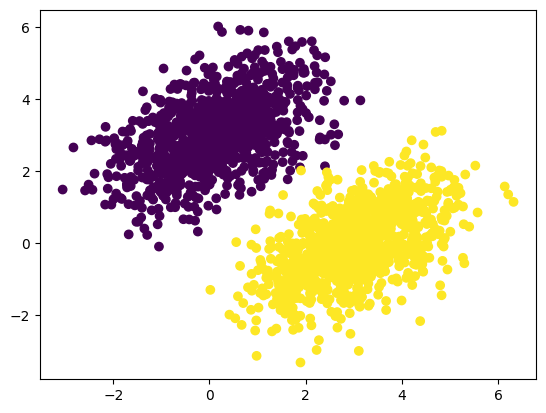

In [27]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

- Step-4: Creating the linear classifier variables

In [28]:
# inputs will be 2D points
input_dim = 2

# Output predictions will be a single score per sample
# (close to 0 if sample is predicted in class 0 and close to 1 if in class 1)
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

- Step-5: Forward pass function

In [29]:
# Since W = [[w1], [w2]] i.e. just two scaler coefficient
# prediction = [[w1], [w2]] • [x, y] + b = w1 * x + w2 * y + b.

def model(inputs):
  return tf.matmul(inputs, W) + b

- Step-6: The mean squared error loss function

In [30]:
def square_loss(targets, predictions):
    # per_sample_losses will be a tensor with the same shape as
    # targets and predictions, containing per-sample loss scores.
    per_sample_losses = tf.square(targets - predictions)

    # We need to average these per-sample loss scores into a
    # single scalar loss value: this is what reduce_mean does.
    # reduce_mean gives single scalar loss value
    return tf.reduce_mean(per_sample_losses)

- Step-7: Training Step Function

In [31]:
learning_rate = 0.1

def training_step(inputs, targets):

    # Forward pass, inside a gradient tape scope
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)

    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])

    # Weight update
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

- Step-8: Batch Training Loop

  - We are doing batch-training instead of mini-batch training.

In [35]:
for step in range(41):
    loss = training_step(inputs, targets)
    if step % 5 == 0 :
      print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0244
Loss at step 5: 0.0244
Loss at step 10: 0.0244
Loss at step 15: 0.0244
Loss at step 20: 0.0244
Loss at step 25: 0.0244
Loss at step 30: 0.0244
Loss at step 35: 0.0244
Loss at step 40: 0.0244


- Final Step

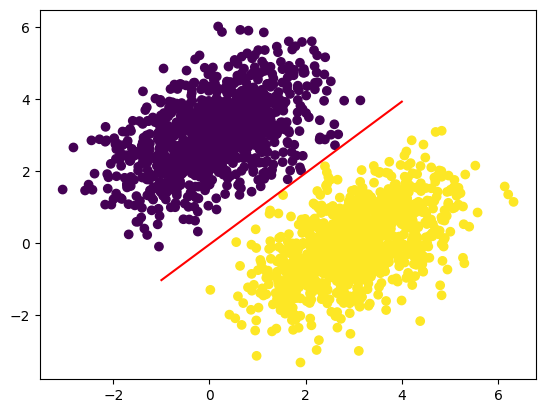

In [37]:
predictions = model(inputs)

x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)